# Estimating Counts

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [1]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

In [2]:
from utils import set_pyplot_params
set_pyplot_params()

In the previous chapter we solved problems that involve estimating proportions.
In the Euro problem, we estimated the probability that a coin lands heads up, and in the exercises, you estimated a batting average, the fraction of people who cheat on their taxes, and the chance of shooting down an invading alien.

Clearly, some of these problems are more realistic than others, and some are more useful than others.

In this chapter, we'll work on problems related to counting, or estimating the size of a population.
Again, some of the examples will seem silly, but some of them, like the German Tank problem, have real applications, sometimes in life and death situations.

在上一章中，我们解决了涉及估计比例的问题。
在欧元问题中，我们估计了一枚硬币正面朝上的概率，在练习中，你估计了一个击球率，即偷税漏税的人的比例，以及击落入侵外星人的机会。

显然，其中一些问题比其他问题更现实，而一些问题比其他问题更有用。

在本章中，我们将研究与计数或估计人口规模相关的问题。
同样，有些例子看起来很傻，但其中一些例子，比如德国坦克问题，有实际应用，有时在生死攸关的情况下。

## The Train Problem

I found the train problem 
in Frederick Mosteller's, [*Fifty Challenging Problems in
  Probability with Solutions*](https://store.doverpublications.com/0486653552.html):

> "A railroad numbers its locomotives in order 1..N.  One day you see a locomotive with the number 60.  Estimate how many locomotives the railroad has."

Based on this observation, we know the railroad has 60 or more
locomotives.  But how many more?  To apply Bayesian reasoning, we
can break this problem into two steps:

* What did we know about $N$ before we saw the data?

* For any given value of $N$, what is the likelihood of seeing the data (a locomotive with number 60)?

The answer to the first question is the prior.  The answer to the
second is the likelihood.

We don't have much basis to choose a prior, so we'll start with
something simple and then consider alternatives.
Let's assume that $N$ is equally likely to be any value from 1 to 1000.

Here's the prior distribution:

## 火车问题

我发现火车问题
在 Frederick Mosteller 的 [*五十个具有挑战性的问题中
  解决方案的概率*](https://store.doverpublications.com/0486653552.html)：

> “一条铁路按 1..N 的顺序编号其机车。有一天你会看到编号为 60 的机车。估计铁路有多少个机车。”

根据这一观察，我们知道铁路有 60 个或更多
机车。但是还有多少？为了应用贝叶斯推理，我们
可以把这个问题分成两个步骤：

* 在我们看到数据之前，我们对 $N$ 了解多少？

* 对于任何给定的 $N$ 值，看到数据的可能性是多少（编号为 60 的机车）？

第一个问题的答案是先验。答案
第二个是可能性。

我们没有太多基础来选择先验，所以我们先从
一些简单的事情，然后考虑替代方案。
让我们假设 $N$ 同样可能是 1 到 1000 之间的任何值。

这是先前的分布：

In [3]:
import numpy as np
from empiricaldist import Pmf

hypos = np.arange(1, 1001)
prior = Pmf(1, hypos)


Now let's figure out the likelihood of the data.
In a hypothetical fleet of $N$ locomotives, what is the probability that we would see number 60?
If we assume that we are equally likely to see any locomotive, the chance of seeing any particular one is $1/N$.

Here's the function that does the update:

现在让我们找出数据的可能性。
在一个假设的由 $N$ 机车组成的机队中，我们看到 60 号机车的概率是多少？
如果我们假设我们同样有可能看到任何机车，那么看到任何特定机车的机会是 $1/N$。

这是执行更新的函数：

In [4]:
def update_train(pmf, data):
    """Update pmf based on new data."""
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

This function might look familiar; it is the same as the update function for the dice problem in the previous chapter.
In terms of likelihood, the train problem is the same as the dice problem.

Here's the update:

这个功能可能看起来很熟悉；与上一章骰子问题的更新函数相同。
就可能性而言，火车问题与骰子问题相同。

这是更新：

In [9]:
data = 60
posterior = prior.copy()
update_train(posterior, data)

Here's what the posterior looks like:

后验是这样的：

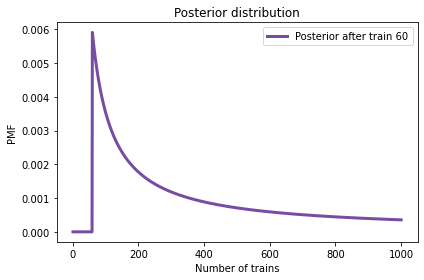

In [13]:
from utils import decorate
posterior.plot(label='Posterior after train 60', color='C4')
decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior distribution')

Not surprisingly, all values of $N$ below 60 have been eliminated.

The most likely value, if you had to guess, is 60.

毫不奇怪，所有低于 60 的 $N$ 值都已被消除。

如果您不得不猜测，最可能的值是 60。

In [10]:
posterior.max_prob()

60

That might not seem like a very good guess; after all, what are the chances that you just happened to see the train with the highest number?
Nevertheless, if you want to maximize the chance of getting
the answer exactly right, you should guess 60.

But maybe that's not the right goal.
An alternative is to compute the mean of the posterior distribution.
Given a set of possible quantities, $q_i$, and their probabilities, $p_i$, the mean of the distribution is:

$$\mathrm{mean} = \sum_i p_i q_i$$

Which we can compute like this:

这似乎不是一个很好的猜测。毕竟，你碰巧看到编号最高的火车的几率是多少？
不过，如果你想最大限度地获得
答案完全正确，你应该猜到 60。

但也许这不是正确的目标。
另一种方法是计算后验分布的平均值。
给定一组可能的数量 $q_i$ 及其概率 $p_i$，分布的平均值为：

$$\mathrm{均值} = \sum_i p_i q_i$$

我们可以这样计算：

In [11]:
np.sum(posterior.ps * posterior.qs)

333.41989326370776

Or we can use the method provided by `Pmf`:

或者我们可以使用 `Pmf` 提供的方法：

In [12]:
posterior.mean()

333.41989326370776

The mean of the posterior is 333, so that might be a good guess if you want to minimize error.
If you played this guessing game over and over, using the mean of the posterior as your estimate would minimize the [mean squared error](http://en.wikipedia.org/wiki/Minimum_mean_square_error) over the long run.

后验的平均值是 333，所以如果你想最小化误差，这可能是一个很好的猜测。
如果您一遍又一遍地玩这个猜谜游戏，从长远来看，使用后验的平均值作为您的估计将使 [均方误差](http://en.wikipedia.org/wiki/Minimum_mean_square_error) 最小化。

## Sensitivity to the Prior

The prior I used in the previous section is uniform from 1 to 1000, but I offered no justification for choosing a uniform distribution or that particular upper bound.
We might wonder whether the posterior distribution is sensitive to the prior.
With so little data---only one observation---it is.

This table shows what happens as we vary the upper bound:

## 对先验的敏感性

我在上一节中使用的先验是从 1 到 1000 的均匀分布，但我没有提供选择均匀分布或特定上限的理由。
我们可能想知道后验分布是否对先验敏感。
数据如此之少——只有一个观察结果——确实如此。

下表显示了当我们改变上限时会发生什么：

In [14]:
import pandas as pd

df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    update_train(pmf, data=60)
    df.loc[high] = pmf.mean()
    
df

,Posterior mean
Upper bound,
500,207.079228
1000,333.419893
2000,552.179017


As we vary the upper bound, the posterior mean changes substantially.
So that's bad.  

When the posterior is sensitive to the prior, there are two ways to proceed:

* Get more data.

* Get more background information and choose a better prior.

With more data, posterior distributions based on different priors tend to converge.  
For example, suppose that in addition to train 60 we also see trains 30 and 90.

Here's how the posterior means depend on the upper bound of the prior, when we observe three trains:

当我们改变上限时，后验均值会发生很大变化。
所以这很糟糕。

当后验对先验敏感时，有两种方法可以进行：

* 获取更多数据。

* 获取更多背景信息并选择更好的先验。

随着数据的增多，基于不同先验的后验分布趋于收敛。
例如，假设除了火车 60 之外，我们还看到火车 30 和 90。

当我们观察三列火车时，后验均值如何取决于先验的上限：

In [15]:
df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

dataset = [30, 60, 90]
for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    pmf = Pmf(1, hypos)
    for data in dataset:
        update_train(pmf, data)
    df.loc[high] = pmf.mean()
    
df

,Posterior mean
Upper bound,
500,151.849588
1000,164.305586
2000,171.338181


The differences are smaller, but apparently three trains are not enough for the posteriors to converge.

差异较小，但显然三列火车不足以使后验收敛。

## Power Law Prior

If more data are not available, another option is to improve the
priors by gathering more background information.
It is probably not reasonable to assume that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

With some effort, we could probably find a list of companies that
operate locomotives in the area of observation.
Or we could interview an expert in rail shipping to gather information about the typical size of companies.

But even without getting into the specifics of railroad economics, we
can make some educated guesses.
In most fields, there are many small companies, fewer medium-sized companies, and only one or two very large companies.

In fact, the distribution of company sizes tends to follow a power law, as Robert Axtell reports in *Science* (<http://www.sciencemag.org/content/293/5536/1818.full.pdf>).

This law suggests that if there are 1000 companies with fewer than
10 locomotives, there might be 100 companies with 100 locomotives,
10 companies with 1000, and possibly one company with 10,000 locomotives.

Mathematically, a power law means that the number of companies with a given size, $N$, is proportional to $(1/N)^{\alpha}$, where $\alpha$ is a parameter that is often near 1.

We can construct a power law prior like this:

## 幂律先验

如果没有更多数据可用，另一种选择是改进
通过收集更多的背景信息来获得先验。
假设一家拥有 1000 辆机车的火车运营公司与一家只有 1 辆机车的公司一样可能是不合理的。

通过一些努力，我们可能会找到一份公司名单，
在观察区域操作机车。
或者我们可以采访一位铁路运输专家，以收集有关公司典型规模的信息。

但即使没有深入了解铁路经济学的细节，我们
可以做出一些有根据的猜测。
在大多数领域，小公司很多，中型公司较少，只有一两家非常大的公司。

事实上，正如 Robert Axtell 在 *Science* (<http://www.sciencemag.org/content/293/5536/1818.full.pdf>) 中报告的那样，公司规模的分布往往遵循幂律。

该定律表明，如果有 1000 家公司少于
10 辆机车，可能有 100 家公司有 100 辆机车，
10 家公司有 1000 辆，可能有 1 家公司有 10,000 辆机车。

在数学上，幂律意味着具有给定规模 $N$ 的公司数量与 $(1/N)^{\alpha}$ 成正比，其中 $\alpha$ 是一个通常接近 1 的参数。

我们可以像这样构造一个幂律先验：

In [ ]:
hypos  ### 1-1000

In [16]:
alpha = 1.0
ps = hypos**(-alpha)
power = Pmf(ps, hypos, name='power law')
power.normalize()

8.178368103610282

For comparison, here's the uniform prior again.
为了比较，这里又是平均的先验。

In [23]:
hypos = np.arange(1, 1001)
uniform = Pmf(1, hypos, name='uniform')
uniform.normalize()

1000

Here's what a power law prior looks like, compared to the uniform prior:

与平均先验相比，这是幂律先验的样子：

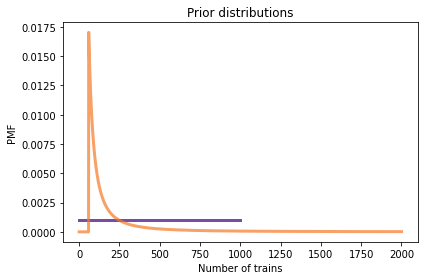

In [24]:
uniform.plot(color='C4')
power.plot(color='C1')

decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Prior distributions')

Here's the update for both priors.

这是两个先验的更新。

In [25]:
dataset = [60]
update_train(uniform, dataset)
update_train(power, dataset)

And here are the posterior distributions.

这是后验分布。

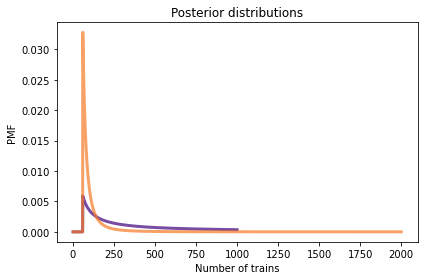

In [26]:
uniform.plot(color='C4')
power.plot(color='C1')

decorate(xlabel='Number of trains',
         ylabel='PMF',
         title='Posterior distributions')

The power law gives less prior probability to high values, which yields lower posterior means, and less sensitivity to the upper bound.

Here's how the posterior means depend on the upper bound when we use a power law prior and observe three trains:

幂律对高值赋予较少的先验概率，从而产生较低的后验均值，并且对上限的敏感性较低。

当我们使用幂律先验并观察三列火车时，后验均值如何取决于上限：

In [27]:
df = pd.DataFrame(columns=['Posterior mean'])
df.index.name = 'Upper bound'

alpha = 1.0
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    hypos = np.arange(1, high+1)
    ps = hypos**(-alpha)
    power = Pmf(ps, hypos)
    for data in dataset:
        update_train(power, data)
    df.loc[high] = power.mean()
    
df

,Posterior mean
Upper bound,
500,130.708470
1000,133.275231
2000,133.997463


Now the differences are much smaller.  In fact,
with an arbitrarily large upper bound, the mean converges on 134.

So the power law prior is more realistic, because it is based on
general information about the size of companies, and it behaves better in practice.

现在差异要小得多。实际上，
具有任意大的上限，均值收敛于 134。

所以幂律先验比较现实，因为它是基于
有关公司规模的一般信息，并且在实践中表现更好。

## Credible Intervals

So far we have seen two ways to summarize a posterior distribution: the value with the highest posterior probability (the MAP) and the posterior mean.
These are both **point estimates**, that is, single values that estimate the quantity we are interested in.

Another way to summarize a posterior distribution is with percentiles.
If you have taken a standardized test, you might be familiar with percentiles.
For example, if your score is the 90th percentile, that means you did as well as or better than 90\% of the people who took the test.

If we are given a value, `x`, we can compute its **percentile rank** by finding all values less than or equal to `x` and adding up their probabilities.

`Pmf` provides a method that does this computation.
So, for example, we can compute the probability that the company has less than or equal to 100 trains:

## 可信区间

到目前为止，我们已经看到了两种总结后验分布的方法：具有最高后验概率（MAP）的值和后验均值。
这些都是**点估计**，即估计我们感兴趣的数量的单个值。

总结后验分布的另一种方法是使用百分位数。
如果您参加过标准化考试，您可能熟悉百分位数。
例如，如果你的分数是第 90 个百分位数，这意味着你的成绩与 90% 的参加考试的人一样好或更好。

如果给定一个值“x”，我们可以通过查找所有小于或等于“x”的值并将它们的概率相加来计算它的**百分比排名**。

`Pmf` 提供了一种执行此计算的方法。
因此，例如，我们可以计算公司拥有少于或等于 100 辆列车的概率：

In [28]:
power.prob_le(100)

0.2937469222495771

With a power law prior and a dataset of three trains, the result is about 29%.
So 100 trains is the 29th percentile.

Going the other way, suppose we want to compute a particular percentile; for example, the median of a distribution is the 50th percentile.
We can compute it by adding up probabilities until the total exceeds 0.5.
Here's a function that does it:

使用幂律先验和三列火车的数据集，结果约为 29%。
所以 100 列火车是第 29 个百分位数。

反过来，假设我们要计算一个特定的百分位数；例如，分布的中位数是第 50 个百分位数。
我们可以通过将概率相加直到总数超过 0.5 来计算它。
这是一个执行此操作的函数：

In [31]:
def quantile(pmf, prob):
    """Compute a quantile with the given prob."""
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= prob:
            return q
    return np.nan

The loop uses `items`, which iterates the quantities and probabilities in the distribution.
Inside the loop we add up the probabilities of the quantities in order.
When the total equals or exceeds `prob`, we return the corresponding quantity.

This function is called `quantile` because it computes a quantile rather than a percentile.
The difference is the way we specify `prob`.
If `prob` is a percentage between 0 and 100, we call the corresponding quantity a percentile.
If `prob` is a probability between 0 and 1, we call the corresponding quantity a **quantile**.

Here's how we can use this function to compute the 50th percentile of the posterior distribution:

循环使用“items”，它迭代分布中的数量和概率。
在循环内部，我们按顺序将数量的概率相加。
当总数等于或超过 `prob` 时，我们返回相应的数量。

此函数称为“分位数”，因为它计算的是分位数而不是百分位数。
不同之处在于我们指定 `prob` 的方式。
如果 `prob` 是 0 到 100 之间的百分比，我们将相应的数量称为百分位数。
如果 `prob` 是介于 0 和 1 之间的概率，我们将相应的量称为**分位数**。

下面是我们如何使用这个函数来计算后验分布的第 50 个百分位数：

In [30]:
quantile(power, 0.5)

113

The result, 113 trains, is the median of the posterior distribution.

`Pmf` provides a method called `quantile` that does the same thing.
We can call it like this to compute the 5th and 95th percentiles:

结果，113 列火车，是后验分布的中位数。

`Pmf` 提供了一个名为 `quantile` 的方法，它可以做同样的事情。
我们可以这样称呼它来计算第 5 和第 95 个百分位数：

In [32]:
power.quantile([0.05, 0.95])

array([ 91., 243.])

The result is the interval from 91 to 243 trains, which implies:

* The probability is 5% that the number of trains is less than or equal to 91.

* The probability is 5% that the number of trains is greater than 243.

Therefore the probability is 90% that the number of trains falls between 91 and 243 (excluding 91 and including 243).
For this reason, this interval is called a 90% **credible interval**.

`Pmf` also provides `credible_interval`, which computes an interval that contains the given probability.

结果是从 91 到 243 列火车的区间，这意味着：

* 列车数量小于或等于 91 的概率为 5%。

* 列车数量大于 243 的概率为 5%。

因此，列车数量在 91 到 243 之间的概率为 90%（不包括 91，包括 243）。
因此，此区间称为 90% **可信区间**。

`Pmf` 还提供了 `credible_interval`，它计算包含给定概率的区间。

In [33]:
power.credible_interval(0.9)

array([ 91., 243.])

## The German Tank Problem

During World War II, the Economic Warfare Division of the American
Embassy in London used statistical analysis to estimate German
production of tanks and other equipment.

The Western Allies had captured log books, inventories, and repair
records that included chassis and engine serial numbers for individual
tanks.

Analysis of these records indicated that serial numbers were allocated
by manufacturer and tank type in blocks of 100 numbers, that numbers
in each block were used sequentially, and that not all numbers in each
block were used.  So the problem of estimating German tank production
could be reduced, within each block of 100 numbers, to a form of the
train problem.

Based on this insight, American and British analysts produced
estimates substantially lower than estimates from other forms
of intelligence.  And after the war, records indicated that they were
substantially more accurate.

They performed similar analyses for tires, trucks, rockets, and other
equipment, yielding accurate and actionable economic intelligence.

The German tank problem is historically interesting; it is also a nice
example of real-world application of statistical estimation.

For more on this problem, see [this Wikipedia page](https://en.wikipedia.org/wiki/German_tank_problem) and Ruggles and Brodie, "An Empirical Approach to Economic Intelligence in World War II", *Journal of the American Statistical Association*, March 1947, [available here](https://web.archive.org/web/20170123132042/https://www.cia.gov/library/readingroom/docs/CIA-RDP79R01001A001300010013-3.pdf).


## 德国坦克问题

二战期间，美国经济战部
驻伦敦大使馆使用统计分析来估计德语
生产坦克和其他设备。

西方盟军占领了航海日志、库存和维修
包括个人底盘和发动机序列号的记录
坦克。

对这些记录的分析表明，分配了序列号
按制造商和储罐类型，以 100 个数字为一组，该数字
在每个块中按顺序使用，并且不是每个块中的所有数字
块被使用。所以估计德国坦克产量的问题
可以在每个 100 个数字的块内减少为
火车问题。

基于这种洞察力，美国和英国的分析家提出了
估计大大低于其他形式的估计
的智力。战后，记录表明他们是
实质上更准确。

他们对轮胎、卡车、火箭和其他
设备，产生准确和可操作的经济情报。

德国坦克问题在历史上很有趣。这也是一个不错的
统计估计的实际应用示例。

有关此问题的更多信息，请参阅 [this Wikipedia page](https://en.wikipedia.org/wiki/German_tank_problem) 和 Ruggles 和 Brodie，“第二次世界大战中经济情报的实证方法”，*美国杂志统计协会*，1947 年 3 月，[可在此处获得]（https://web.archive.org/web/20170123132042/https://www.cia.gov/library/readingroom/docs/CIA-RDP79R01001A001300010013-3.pdf） .

## Informative Priors

Among Bayesians, there are two approaches to choosing prior
distributions.  Some recommend choosing the prior that best represents
background information about the problem; in that case the prior
is said to be **informative**.  The problem with using an informative
prior is that people might have different information or
interpret it differently.  So informative priors might seem arbitrary.

The alternative is a so-called **uninformative prior**, which is
intended to be as unrestricted as possible, in order to let the data
speak for itself.  In some cases you can identify a unique prior
that has some desirable property, like representing minimal prior
information about the estimated quantity.

Uninformative priors are appealing because they seem more
objective.  But I am generally in favor of using informative priors.
Why?  First, Bayesian analysis is always based on
modeling decisions.  Choosing the prior is one of those decisions, but
it is not the only one, and it might not even be the most subjective.
So even if an uninformative prior is more objective, the entire analysis is still subjective.

Also, for most practical problems, you are likely to be in one of two
situations: either you have a lot of data or not very much.  If you have a lot of data, the choice of the prior doesn't matter;
informative and uninformative priors yield almost the same results.
If you don't have much data, using relevant background information (like the power law distribution) makes a big difference.

And if, as in the German tank problem, you have to make life and death
decisions based on your results, you should probably use all of the
information at your disposal, rather than maintaining the illusion of
objectivity by pretending to know less than you do.

## 信息先验

在贝叶斯中，有两种选择先验的方法
分布。有些人建议选择最能代表的先验
有关问题的背景信息；在这种情况下，先验的
被认为是**信息丰富的**。使用信息性先验的问题是人们可能有不同的信息或
以不同的方式解释它。因此，信息丰富的先验似乎是武断的。

另一种方法是所谓的**无信息先验**，即
旨在尽可能不受限制，以便让数据
为自己说话。在某些情况下，您可以识别唯一的先验
具有一些理想的属性，例如表示最小先验
有关估计数量的信息。

无信息的先验很有吸引力，因为它们看起来更多
客观的。但我通常赞成使用信息先验。
为什么？首先，贝叶斯分析总是基于
建模决策。选择先验是这些决定之一，但是
它不是唯一的，甚至可能不是最主观的。
因此，即使没有信息的先验更客观，整个分析仍然是主观的。

此外，对于大多数实际问题，您可能处于以下两种情况之一
情况：要么你有很多数据，要么不是很多。如果您有大量数据，则先验的选择无关紧要；
有信息和无信息的先验产生几乎相同的结果。
如果您没有太多数据，使用相关的背景信息（如幂律分布）会有很大的不同。

而且，如果像德国坦克问题一样，您必须生死攸关
根据您的结果做出决定，您可能应该使用所有
信息供您使用，而不是维持
假装知道的比你少，从而保持客观。

## Summary

This chapter introduces the train problem, which turns out to have the same likelihood function as the dice problem, and which can be applied to the German Tank problem.
In all of these examples, the goal is to estimate a count, or the size of a population.

In the next chapter, I'll introduce "odds" as an alternative to probabilities, and Bayes's Rule as an alternative form of Bayes's Theorem.
We'll compute distributions of sums and products, and use them to estimate the number of Members of Congress who are corrupt, among other problems.

But first, you might want to work on these exercises.

## 概括

本章介绍了火车问题，它与骰子问题具有相同的似然函数，并且可以应用于德国坦克问题。
在所有这些示例中，目标是估计计数或人口规模。

在下一章中，我将介绍“赔率”作为概率的替代形式，以及贝叶斯法则作为贝叶斯定理的替代形式。
我们将计算总和和乘积的分布，并使用它们来估计腐败的国会议员人数以及其他问题。

但首先，您可能想要进行这些练习。

## Exercises

**Exercise:** Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room. 

You think there are fewer then 1200 people, and you offer to prove it.
It would take too long to count, so you try an experiment:

* You ask how many people were born on May 11 and two people raise their hands.  

* You ask how many were born on May 23 and 1 person raises their hand.  
* Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience?  What is the probability that there are more than 1200 people.
Hint: Remember the binomial distribution.

**练习**：假设你在一个大报告厅演讲，消防队长打断了他们，因为他们认为观众超过了 1200 人，这是房间的安全容量。

你认为只有不到 1200 人，你提出要证明这一点。
计算时间太长，所以你尝试一个实验：

* 你问5月11日有多少人出生，两个人举手。

* 你问有多少人在 5 月 23 日出生，有 1 人举手。
* 最后，你问有多少人是在 8 月 1 日出生的，没有人举手。

观众中有多少人？超过1200人的概率是多少。
提示：记住二项分布。

http://allendowney.github.io/ThinkBayes2/chap05.html

In [42]:
# Solution goes here
### 正确答案
# Solution

# I'll use a uniform prior from 1 to 2000
# (we'll see that the probability is small that there are
# more than 2000 people in the room)

hypos = np.arange(1, 2000, 1)
prior = Pmf(1, hypos)
prior.normalize()

1999

In [43]:
# Solution goes here
# Solution

# We can use the binomial distribution to compute the probability
# of the data for each hypothetical audience size

from scipy.stats import binom

likelihood1 = binom.pmf(2, hypos, 1/365)
likelihood2 = binom.pmf(1, hypos, 1/365)
likelihood3 = binom.pmf(0, hypos, 1/365)

In [44]:
# Solution goes here
# Solution

# Here's the update

posterior = prior * likelihood1 * likelihood2 * likelihood3
posterior.normalize()

0.006762190887651753

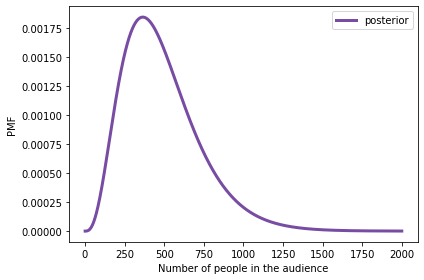

In [45]:
# Solution goes here
# Click to hide# Solution

# And here's the posterior distribution

posterior.plot(color='C4', label='posterior')
decorate(xlabel='Number of people in the audience',
         ylabel='PMF')

In [28]:
# Solution goes here

In [29]:
# Solution goes here

**Exercise:** I often see [rabbits](https://en.wikipedia.org/wiki/Eastern_cottontail) in the garden behind my house, but it's not easy to tell them apart, so I don't really know how many there are.

Suppose I deploy a motion-sensing [camera trap](https://en.wikipedia.org/wiki/Camera_trap) that takes a picture of the first rabbit it sees each day.  After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my garden?

To answer this question, we have to think about the prior distribution and the likelihood of the data:

* I have sometimes seen four rabbits at the same time, so I know there are at least that many.  I would be surprised if there were more than 10.  So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.

* To keep things simple, let's assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day.  Let's also assume it is guaranteed that the camera trap gets a picture every day.

**练习**： 我经常在我家后面的花园里看到[兔子](https://en.wikipedia.org/wiki/Eastern_cottontail)，但很难区分它们，所以我不太清楚有多少。

假设我部署了一个运动感应 [相机陷阱](https://en.wikipedia.org/wiki/Camera_trap)，它会为它每天看到的第一只兔子拍照。三天后，我比较了图片，得出的结论是其中两个是同一只兔子，另一个是不同的。

有多少只兔子参观我的花园？

要回答这个问题，我们必须考虑数据的先验分布和可能性：

* 我有时会同时看到四只兔子，所以我知道至少有那么多。如果超过 10 个，我会感到惊讶。所以，至少作为一个起点，我认为 4 到 10 之前的统一是合理的。

* 为简单起见，让我们假设所有访问我花园的兔子在某一天被相机陷阱捕捉到的可能性相同。我们还假设可以保证相机陷阱每天都能拍到一张照片。

In [49]:
# Solution goes here

# Solution
### 正确答案
hypos = np.arange(4, 11)
prior = Pmf(1, hypos)
# likelihood = binom.pmf(hypotheses, hypos, 1/365)


In [50]:
# # Solution goes here
# Click to hide# Solution

# The probability that the second rabbit is the same as the first is 1/N
# The probability that the third rabbit is different is (N-1)/N

N = hypos
likelihood = (N-1) / N**2

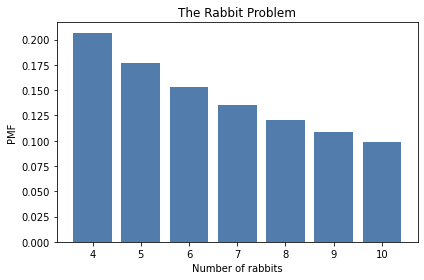

In [51]:
# Solution goes here

# Solution

posterior = prior * likelihood
posterior.normalize()

posterior.bar(alpha=0.7)
decorate(xlabel='Number of rabbits',
         ylabel='PMF',
         title='The Rabbit Problem')

**Exercise:** Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each.  One day, you visit a prison and choose a prisoner at random.  What is the probability that they are serving a 3-year sentence?  What is the average remaining sentence of the prisoners you observe?

**练习：** 假设在刑事司法系统中，所有的刑期都是 1 年、2 年或 3 年，每个刑期都相同。有一天，你参观一所监狱并随机选择一名囚犯。他们服刑 3 年的概率是多少？你观察到的囚犯平均剩余刑期是多少？

In [57]:
### 正确答案
# Solution goes here
# Solution

# Here's the prior distribution of sentences

hypos = np.arange(1, 4)
prior = Pmf(1/3, hypos)
prior
# likelihood = binom.pmf(hypotheses, hypos, 1/365)


,probs
1,0.333333
2,0.333333
3,0.333333


In [55]:
# Solution goes here
# Solution

# If you visit a prison at a random point in time,
# the probability of observing any given prisoner
# is proportional to the duration of their sentence.

likelihood = hypos
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
1,0.166667
2,0.333333
3,0.500000


In [56]:
# Solution goes here
# Solution

# The mean of the posterior is the average sentence.
# We can divide by 2 to get the average remaining sentence.

posterior.mean() / 2

1.1666666666666665

**Exercise:** If I chose a random adult in the U.S., what is the probability that they have a sibling?  To be precise, what is the probability that their mother has had at least one other child.

[This article from the Pew Research Center](https://www.pewsocialtrends.org/2015/05/07/family-size-among-mothers/) provides some relevant data.  

**练习**：如果我在美国随机选择一个成年人，他们有兄弟姐妹的概率是多少？准确地说，他们的母亲至少有另一个孩子的概率是多少。

[本文来自皮尤研究中心](https://www.pewsocialtrends.org/2015/05/07/family-size-among-mothers/) 提供了一些相关数据。

From it, I extracted the following distribution of family size for mothers in the U.S. who were 40-44 years old in 2014:

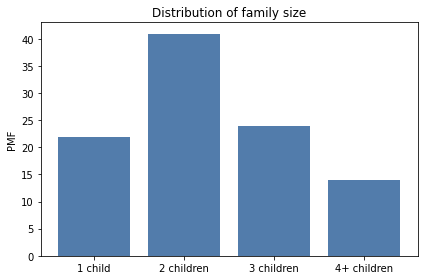

In [58]:
import matplotlib.pyplot as plt

qs = [1, 2, 3, 4]
ps = [22, 41, 24, 14]
prior = Pmf(ps, qs)
prior.bar(alpha=0.7)

plt.xticks(qs, ['1 child', '2 children', '3 children', '4+ children'])
decorate(ylabel='PMF',
         title='Distribution of family size')

For simplicity, let's assume that all families in the 4+ category have exactly 4 children.

为简单起见，我们假设 4+ 类别中的所有家庭正好有 4 个孩子。

In [62]:
# Solution goes here
# Solution

# When you choose a person a random, you are more likely to get someone
# from a bigger family; in fact, the chance of choosing someone from
# any given family is proportional to the number of children
### 正确答案
likelihood = qs
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
1,0.094828
2,0.353448
3,0.310345
4,0.241379


In [63]:
# Solution goes here
# Solution

# The probability that they have a sibling is the probability
# that they do not come from a family of 1 

1 - posterior[1]

0.9051724137931034

In [64]:
# Solution goes here
# Solution

# Or we could use prob_gt again

posterior.prob_gt(1)

0.9051724137931034

**Exercise:** The [Doomsday argument](https://en.wikipedia.org/wiki/Doomsday_argument) is "a probabilistic argument that claims to predict the number of future members of the human species given an estimate of the total number of humans born so far."

Suppose there are only two kinds of intelligent civilizations that can happen in the universe.  The "short-lived" kind go exinct after only 200 billion individuals are born.  The "long-lived" kind survive until 2,000 billion individuals are born.
And suppose that the two kinds of civilization are equally likely.
Which kind of civilization do you think we live in?  

The Doomsday argument says we can use the total number of humans born so far as data.
According to the [Population Reference Bureau](https://www.prb.org/howmanypeoplehaveeverlivedonearth/), the total number of people who have ever lived is about 108 billion.

Since you were born quite recently, let's assume that you are, in fact, human being number 108 billion.
If $N$ is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or $N$, or any number in between.
So what is the probability that you would be number 108 billion?

Given this data and dubious prior, what is the probability that our civilization will be short-lived?

**练习：**  [世界末日论据](https://en.wikipedia.org/wiki/Doomsday_argument) 是“一种概率论据，它声称根据对总数的估计来预测人类物种未来成员的数量迄今为止出生的人类数量。”

假设宇宙中只有两种智能文明可以发生。 “短命”的物种仅在 2000 亿人出生后就灭绝了。 “长寿”的种类会一直存活到 20000 亿人出生。
并假设这两种文明的可能性相同。
你认为我们生活在哪种文明中？

世界末日论点说，我们可以使用迄今为止出生的人类总数作为数据。
根据[人口资料局](https://www.prb.org/howmanypeoplehaveeverlivedonearth/)，曾经活过的总人口约为1080亿。

由于您是最近出生的，我们假设您实际上是第 1080 亿人。
如果 $N$ 是永远活着的总人数，并且我们认为您是一个随机选择的人，那么您很可能是第 1 个人，或 $N$，或介于两者之间的任何数字。
那么你成为 1080 亿的概率是多少？

鉴于这些数据和可疑的先验，我们的文明短暂存在的概率是多少？

In [68]:
# Solution

hypos = [200, 2000]
prior = Pmf(1, hypos)
prior

,probs
200,1
2000,1


In [66]:
# Solution goes here
# Solution

likelihood = 1/prior.qs
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
200,0.909091
2000,0.090909


In [42]:
# Solution goes here